In [1]:
# 모듈이 임포트
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

In [2]:
g=9.8; R=6.4e6; Ve=1.12e4
v0=Ve/(1.*np.sqrt(2))/1.3; theta=np.pi/8
v0x,v0y=v0*np.cos(theta), v0*np.sin(theta)
x0,y0=0, R


dx=0.00001
def f(x,y):
    if y>0:
        f=np.sqrt(-x**2+R**2)
    elif y<0:
        f=-np.sqrt(-x**2+R**2)
    return f
def M(x,y):
    m=(f(x+dx,y)-f(x,y))/dx
    return m

In [3]:
dt=4.; T=2000
x,y=x0,y0
vx,vy=v0x,v0y
X,Y=[x],[y]

n=0
k=0
while k<T:
    x+=vx*dt;y+=vy*dt 
    r=np.sqrt(x**2+y**2)
    ax= -g*R*R*x/(r**3); ay=-g*R*R*y/(r**3)
    vx+=ax*dt; vy+=ay*dt 
    X.append(x)
    Y.append(y)
    
    if (r<R) :
        alpha=np.arctan(vy/vx)
        m=M(x,y)
        dprtm=np.arctan(m)
        if (0<np.arctan(y/x)<np.pi/2): 
            if y>0:
                d_dp=dprtm+abs(alpha-dprtm)
            elif y<0:
                d_dp=dprtm+abs(alpha-dprtm)+np.pi
        elif (-(np.pi/2)<np.arctan(y/x)<0): 
            if y>0:
                d_dp=dprtm+abs(alpha-dprtm)
            elif y<0:  #4
                d_dp=dprtm-np.pi+abs(alpha-dprtm)  
        v=np.sqrt(vx**2+vy**2)
        vx=v*np.cos(d_dp); vy=v*np.sin(d_dp)
        n+=1
    k+=1


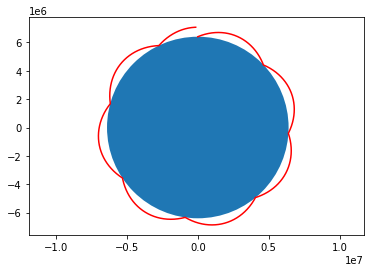

In [4]:
a = plt.axes(xlim=(-2*R,2*R),ylim=(-2*R,2*R))
c = plt.Circle((0,0),R)
a.add_patch(c)
plt.axis('equal')
plt.plot(X,Y,'r')
